In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb
from lightgbm import LGBMRegressor as lgbr
import time

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data = pd.read_csv('/content/drive/My Drive/team_project/Dataset3.csv', sep=',' , encoding='CP949')

In [0]:
data

,NODE_ID,NODE_NAME,SI_CODE,GU_CODE,X,Y,Longitude,Latitude,Radius,trafficlight_num,crosswalk_num,station_num,school_num,land_price,house_1,house_2,house_3,house_4,commerce_1,commerce_2,commerce_3,commerce_4,green_1,green_2,green_3,industry_1,industry_2,industry_3,limit_num,mediansep_,island_num,mean_lanes,mean_speed,mean_wth,mean_loadlen,busstop_num,police_num,CtoC_num,CtoP_num,total_acc
0,1150016800,현대맨션,A,DD,9.419266e+05,1950157.631,126.842562,37.548928,37,0,1,0,0,5.102635e+07,0.996526,0.003474,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,30.0,4.500000,281.000000,0,0,1,0,1
1,1160006100,신흥빌라,A,GG,9.425428e+05,1942717.922,126.850119,37.481912,37,0,1,0,1,2.834985e+07,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,1,1.00,60.0,4.000000,645.500000,1,0,3,2,5
2,1160035000,연흥학원,A,GG,9.457569e+05,1944979.108,126.886304,37.502487,37,0,1,0,0,8.244801e+07,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,30.0,4.666667,130.333333,0,1,2,3,5
3,1160044000,한일유앤아이아파트,A,GG,9.425526e+05,1945551.749,126.850009,37.507454,37,0,0,0,2,1.929201e+07,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,1.00,60.0,3.000000,433.000000,2,0,0,4,4
4,1100025000,연지초교,A,II,9.610632e+05,1959527.770,127.058698,37.634391,37,0,1,1,1,2.064954e+07,0.986185,0.013815,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0,2,1.00,30.0,4.500000,616.000000,0,1,7,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051,1380028700,-,B,PP,1.147437e+06,1691149.431,129.119698,35.204871,54,9,0,0,0,9.516307e+05,0.000000,0.000000,0.326679,0.000000,0.0,0.0,0.0,0.0,0.673321,0.0,0.0,0.0,0.0,0.0,0.000000,1,0,3.40,56.0,42.225000,7500.000000,0,0,34,3,37
6052,1380029400,-,B,PP,1.147537e+06,1692084.379,129.120957,35.213283,55,12,2,0,0,3.826632e+06,0.000000,0.048482,0.000000,0.000000,0.0,0.0,0.0,0.0,0.064315,0.0,0.0,0.0,0.0,0.0,0.887203,1,2,4.00,52.5,42.225000,7500.000000,0,0,62,4,66
6053,1320005200,-,B,EE,1.142002e+06,1682717.438,129.058556,35.129650,56,0,0,0,0,3.825333e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1,1,3.75,57.5,50.000000,3400.000000,0,0,30,10,40
6054,1320004900,-,B,EE,1.141862e+06,1682590.225,129.056998,35.128523,56,0,0,0,0,1.623048e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,1,0,3.40,52.0,50.000000,3400.000000,0,0,4,1,5


In [0]:
raw_x = data[['trafficlight_num','crosswalk_num','station_num','school_num','land_price','house_1','house_2','house_3','house_4','commerce_1','commerce_2','commerce_3','commerce_4','green_1','green_2','green_3','industry_1','industry_2','industry_3','limit_num','mediansep_','island_num','mean_lanes','mean_speed','mean_wth','mean_loadlen','busstop_num','police_num']]
raw_y = data[['total_acc']]
raw_y_CtoC = data[['CtoC_num']]
raw_y_CtoP = data[['CtoP_num']]

In [0]:
x, test_x , y, test_y = train_test_split(raw_x, raw_y, test_size = 0.2, random_state = 42)
train_x, valid_x , train_y, valid_y = train_test_split(x, y, test_size = 0.375, random_state = 42)

x, test_x , y_CtoC, test_y_CtoC = train_test_split(raw_x, raw_y_CtoC, test_size = 0.2, random_state = 42)
train_x, valid_x , train_y_CtoC, valid_y_CtoC = train_test_split(x, y_CtoC, test_size = 0.375, random_state = 42)

x, test_x , y_CtoP, test_y_CtoP = train_test_split(raw_x, raw_y_CtoP, test_size = 0.2, random_state = 42)
train_x, valid_x , train_y_CtoP, valid_y_CtoP = train_test_split(x, y_CtoP, test_size = 0.375, random_state = 42)


In [0]:
train_set = lgb.Dataset(train_x, train_y)
valid_set = lgb.Dataset(valid_x, valid_y) 
test_set = lgb.Dataset(test_x, test_y)

train_set_CtoC = lgb.Dataset(train_x, train_y_CtoC)
valid_set_CtoC = lgb.Dataset(valid_x, valid_y_CtoC) 
test_set_CtoC = lgb.Dataset(test_x, test_y_CtoC)

train_set_CtoP = lgb.Dataset(train_x, train_y_CtoP)
valid_set_CtoP = lgb.Dataset(valid_x, valid_y_CtoP) 
test_set_CtoP = lgb.Dataset(test_x, test_y_CtoP)

In [0]:
params = {'learning_rate':0.01,
          'max_depth':1000,
          'boosting_type':'gbdt',
          'objective':'regression',
          'metrics':'mse',
          'is_training_metric':True,
          'num_leaves':1000,
          'feature_fraction':0.7,
          'bagging_fraction':0.7,
          'bagging_freq':5,
          'seed':2019}


------------------------------------------
total


In [0]:
start = time.time()
model = lgb.train(params, train_set, 3000, valid_sets = valid_set ,verbose_eval = 100, early_stopping_rounds=3000)
print("time: ", time.time() - start ,"seconds")

Training until validation scores don't improve for 3000 rounds.
[100]	valid_0's l2: 847.42
[200]	valid_0's l2: 671.951
[300]	valid_0's l2: 632.798
[400]	valid_0's l2: 624.679
[500]	valid_0's l2: 622.174
[600]	valid_0's l2: 624.957
[700]	valid_0's l2: 624.61
[800]	valid_0's l2: 626.612
[900]	valid_0's l2: 628.271
[1000]	valid_0's l2: 629.906
[1100]	valid_0's l2: 632.037
[1200]	valid_0's l2: 632.868
[1300]	valid_0's l2: 634.286
[1400]	valid_0's l2: 635.798
[1500]	valid_0's l2: 636.791
[1600]	valid_0's l2: 638.05
[1700]	valid_0's l2: 639.778
[1800]	valid_0's l2: 642.016
[1900]	valid_0's l2: 643.56
[2000]	valid_0's l2: 644.54
[2100]	valid_0's l2: 645.672
[2200]	valid_0's l2: 645.858
[2300]	valid_0's l2: 647.517
[2400]	valid_0's l2: 648.684
[2500]	valid_0's l2: 649.361
[2600]	valid_0's l2: 650.459
[2700]	valid_0's l2: 650.886
[2800]	valid_0's l2: 651.458
[2900]	valid_0's l2: 652.048
[3000]	valid_0's l2: 653.062
Did not meet early stopping. Best iteration is:
[506]	valid_0's l2: 622.097
time

In [0]:
predict_test = model.predict(test_x, num_iteration= model.best_iteration)

In [0]:
mse = mean_squared_error(test_y, predict_test)
r2 = r2_score(test_y, predict_test)

mse_lst = []
r2_lst = []

mse_lst.append(mse)
r2_lst.append(r2)

print('Mean squared error: ', mse)
print('R2 score: ', r2)

print(len(mse_lst))
print('mean of mse: ',np.mean(mse_lst))
print('mean of r2: ',np.mean(r2_lst))

''' 몇번을 해도 계속 같은 값이 나옴 '''

Mean squared error:  518.4295338699914
R2 score:  0.7120551936620014
1
mean of mse:  518.4295338699914
mean of r2:  0.7120551936620014


' 몇번을 해도 계속 같은 값이 나옴 '

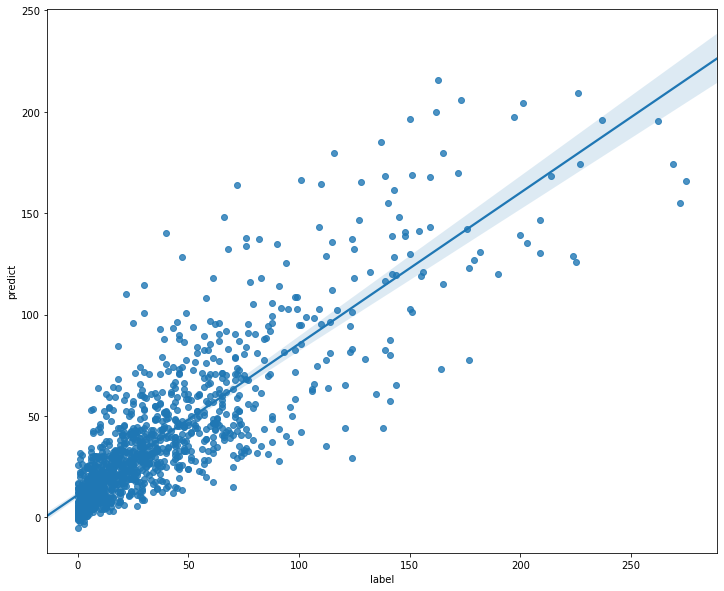

In [0]:
final_result = pd.concat([test_y.reset_index(drop = True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['label','predict']
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.regplot(x = 'label', y = 'predict', data = final_result, ax = ax)

-------------------------------------------------------------------------------
CtoC

In [0]:
start = time.time()
model = lgb.train(params, train_set_CtoC, 3000, valid_sets = valid_set_CtoC ,verbose_eval = 100, early_stopping_rounds=3000)
print("time: ", time.time() - start ,"seconds")

Training until validation scores don't improve for 3000 rounds.
[100]	valid_0's l2: 619.814
[200]	valid_0's l2: 493.343
[300]	valid_0's l2: 464.856
[400]	valid_0's l2: 458.618
[500]	valid_0's l2: 456.47
[600]	valid_0's l2: 458.732
[700]	valid_0's l2: 458.289
[800]	valid_0's l2: 459.244
[900]	valid_0's l2: 460.268
[1000]	valid_0's l2: 461.298
[1100]	valid_0's l2: 463.366
[1200]	valid_0's l2: 464.118
[1300]	valid_0's l2: 464.47
[1400]	valid_0's l2: 465.324
[1500]	valid_0's l2: 465.963
[1600]	valid_0's l2: 467.157
[1700]	valid_0's l2: 467.763
[1800]	valid_0's l2: 468.584
[1900]	valid_0's l2: 469.614
[2000]	valid_0's l2: 470.017
[2100]	valid_0's l2: 470.894
[2200]	valid_0's l2: 471.571
[2300]	valid_0's l2: 472.698
[2400]	valid_0's l2: 473.441
[2500]	valid_0's l2: 473.409
[2600]	valid_0's l2: 473.689
[2700]	valid_0's l2: 474.488
[2800]	valid_0's l2: 474.778
[2900]	valid_0's l2: 474.574
[3000]	valid_0's l2: 475.456
Did not meet early stopping. Best iteration is:
[508]	valid_0's l2: 456.195
t

In [0]:
predict_test_CtoC = model.predict(test_x, num_iteration= model.best_iteration)

CtoC_mse = mean_squared_error(test_y_CtoC, predict_test_CtoC)
CtoC_r2 = r2_score(test_y_CtoC, predict_test_CtoC)

CtoC_mse_lst = []
CtoC_r2_lst = []

CtoC_mse_lst.append(CtoC_mse)
CtoC_r2_lst.append(CtoC_r2)
print('Mean squared error: ', CtoC_mse)
print('R2 score: ', CtoC_r2)

print(len(mse_lst))
print('mean of mse: ',np.mean(CtoC_mse_lst))
print('mean of r2: ',np.mean(CtoC_r2_lst))

Mean squared error:  373.50486817267256
R2 score:  0.71402954565204
1
mean of mse:  373.50486817267256
mean of r2:  0.71402954565204


-------------------------------------------------------------------------------
CtoP

In [0]:
start = time.time()
model = lgb.train(params, train_set_CtoP, 3000, valid_sets = valid_set_CtoP ,verbose_eval = 100, early_stopping_rounds=3000)
print("time: ", time.time() - start ,"seconds")

Training until validation scores don't improve for 3000 rounds.
[100]	valid_0's l2: 63.5336
[200]	valid_0's l2: 57.0576
[300]	valid_0's l2: 55.3558
[400]	valid_0's l2: 54.9438
[500]	valid_0's l2: 54.9218
[600]	valid_0's l2: 55.0001
[700]	valid_0's l2: 55.1598
[800]	valid_0's l2: 55.3461
[900]	valid_0's l2: 55.5872
[1000]	valid_0's l2: 55.7801
[1100]	valid_0's l2: 56.0531
[1200]	valid_0's l2: 56.1272
[1300]	valid_0's l2: 56.2441
[1400]	valid_0's l2: 56.5486
[1500]	valid_0's l2: 56.716
[1600]	valid_0's l2: 56.9133
[1700]	valid_0's l2: 57.0849
[1800]	valid_0's l2: 57.2181
[1900]	valid_0's l2: 57.3011
[2000]	valid_0's l2: 57.3976
[2100]	valid_0's l2: 57.4923
[2200]	valid_0's l2: 57.6806
[2300]	valid_0's l2: 57.8006
[2400]	valid_0's l2: 57.9135
[2500]	valid_0's l2: 57.9641
[2600]	valid_0's l2: 58.0478
[2700]	valid_0's l2: 58.1329
[2800]	valid_0's l2: 58.2169
[2900]	valid_0's l2: 58.2903
[3000]	valid_0's l2: 58.3307
Did not meet early stopping. Best iteration is:
[535]	valid_0's l2: 54.8758


In [0]:
model.best_iteration

535

In [0]:
predict_test_CtoP = model.predict(test_x, num_iteration= model.best_iteration)

CtoP_mse = mean_squared_error(test_y_CtoP, predict_test_CtoP)
CtoP_r2 = r2_score(test_y_CtoP, predict_test_CtoP)

CtoP_mse_lst = []
CtoP_r2_lst = []

CtoP_mse_lst.append(CtoP_mse)
CtoP_r2_lst.append(CtoP_r2)
print('Mean squared error: ', CtoP_mse)
print('R2 score: ', CtoP_r2)

print(len(CtoP_mse_lst))
print('mean of mse: ',np.mean(CtoP_mse_lst))
print('mean of r2: ',np.mean(CtoP_r2_lst))

Mean squared error:  50.47906321420979
R2 score:  0.44629379837208516
1
mean of mse:  50.47906321420979
mean of r2:  0.44629379837208516


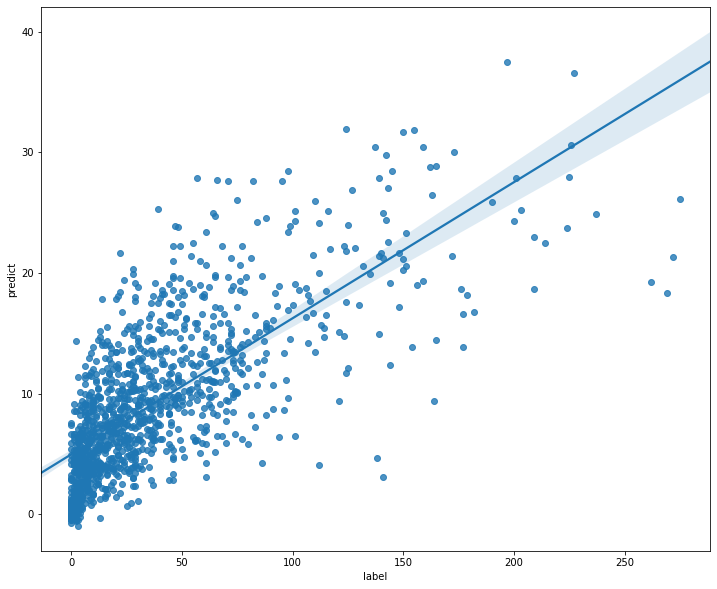

In [0]:
final_result = pd.concat([test_y.reset_index(drop = True), pd.DataFrame(predict_test_CtoP)], axis = 1)
final_result.columns = ['label','predict']
fig, ax = plt.subplots()
fig.set_size_inches(12,10)
sns.regplot(x = 'label', y = 'predict', data = final_result, ax = ax)

In [0]:
combined_result = predict_test_CtoC + predict_test_CtoP

In [0]:
combined_mse = mean_squared_error(test_y, combined_result)
combined_r2 = r2_score(test_y,combined_result)

mse_lst = []
r2_lst = []

mse_lst.append(mse)
r2_lst.append(r2)

print('total Mean squared error: ', mse)
print('total R2 score: ', r2)

print('Combined Mean squared error: ', combined_mse)
print('Combined R2 score: ', combined_r2)

print(len(mse_lst))
print('combined mean of mse: ',np.mean(mse_lst))
print('combined mean of r2: ',np.mean(r2_lst))

total Mean squared error:  518.4295338699914
total R2 score:  0.7120551936620014
Combined Mean squared error:  523.557454957905
Combined R2 score:  0.7092070568408726
1
combined mean of mse:  518.4295338699914
combined mean of r2:  0.7120551936620014


In [0]:
# if  "Radius" in raw_x:
#     case1 = mse
#     case2 = combined_mse
#     case3 = 0
#     case4 = 0
# else:    
#     case3 = mse
#     case4 = combined_mse

In [0]:
# x = ['case1', 'case2', 'case3', 'case4']

# y = [case1, case2, case3, case4]

# plt.xlabel('catboost')
# plt.ylabel('mse')
# plt.bar(x,y,width = 0.7, color = 'green')

In [0]:
# for cases in y:
#     print(cases)

In [0]:
# import matplotlib.pyplot as plt

# x = ['case1', 'case2', 'case3', 'case4']
# y = [530.6768861141264, 529.5343409397318, 518.4295338699914, 523.557454957905]

# plt.xlabel('lightgbm')
# plt.ylabel('mse')
# plt.ylim(515,540)
# plt.bar(x,y,width = 0.7, color = 'green')